# Examen Parcial 1 - Ejercicio 1

Este cuaderno resuelve el **Ejercicio 1** con la matriz de adyacencia de comunas/corregimientos de Medellin.

Se realiza:
1. Construccion de la matriz de adyacencia `A`.
2. Estandarizacion del indicador de hurto a personas por comuna/corregimiento.
3. Construccion de la matriz de pesos `W` sobre aristas existentes.
4. Calculo de la Laplaciana normalizada `L_sym`.
5. Calculo del vector de Fiedler y propuesta de particion del grafo.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Paso 1: Definimos los nodos y la matriz de adyacencia A.
# Esto representa la estructura del grafo (quien limita con quien).
# Es la base sobre la cual luego construiremos W y la Laplaciana.

# Nombres de nodos (comunas/corregimientos)
labels = [
    "01 Popular", "02 Santa Cruz", "03 Manrique", "04 Aranjuez", "05 Castilla",
    "06 Doce de Octubre", "07 Robledo", "08 Villa Hermosa", "09 Buenos Aires",
    "10 La Candelaria", "11 Laureles Estadio", "12 La America", "13 San Javier",
    "14 El Poblado", "15 Guayabal", "16 Belen", "50 Palmitas", "60 San Cristobal",
    "70 Altavista", "80 Prado", "90 Santa Elena"
]

# Matriz de adyacencia (A)
A = np.array([
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
], dtype=float)

print("Dimensiones de A:", A.shape)
print("A es simetrica:", np.allclose(A, A.T))

Dimensiones de A: (21, 21)
A es simetrica: True


In [21]:
# Paso 2: Cargamos el indicador h_i (hurto a personas) por nodo.
# Luego lo estandarizamos para que los valores sean comparables entre comunas
# (media 0 y desviacion estandar 1).

# Hurto a personas (columna 2026 del informe semanal)
# Ordenado exactamente como 'labels'
h = np.array([
    18, 11, 36, 79, 87, 33, 74, 29, 88, 456, 276,
    42, 35, 252, 72, 101, 1, 25, 15, 11, 15
], dtype=float)

# Estandarizacion h_tilde = (h_i - media)/desv_std
h_mean = h.mean()
h_std = h.std(ddof=0)
h_tilde = (h - h_mean) / h_std

df_h = pd.DataFrame({
    "nodo": labels,
    "hurto_2026": h,
    "h_tilde": h_tilde
})

df_h

,nodo,hurto_2026,h_tilde
0,01 Popular,18.0,-0.600146
1,02 Santa Cruz,11.0,-0.664167
2,03 Manrique,36.0,-0.435520
3,04 Aranjuez,79.0,-0.042245
4,05 Castilla,87.0,0.030922
5,06 Doce de Octubre,33.0,-0.462957
6,07 Robledo,74.0,-0.087975
7,08 Villa Hermosa,29.0,-0.499541
8,09 Buenos Aires,88.0,0.040068
9,10 La Candelaria,456.0,3.405763


In [22]:
# Paso 3: Construimos la matriz de pesos W.
# Solo hay peso donde existe arista en A.
# La formula da pesos altos entre nodos con indicadores similares,
# y pesos bajos cuando son muy diferentes.

# Matriz de pesos W sobre aristas existentes
# W_ij = exp(-((h_tilde_i - h_tilde_j)^2) / (2*sigma^2)) si A_ij=1, si no 0
sigma = 1.0
delta = h_tilde[:, None] - h_tilde[None, :]
W = np.exp(-(delta ** 2) / (2 * sigma ** 2)) * A

# Matriz de grados de W
d = W.sum(axis=1)
D_w = np.diag(d)

print("W shape:", W.shape)
print("W simetrica:", np.allclose(W, W.T))
print("Grados por nodo:")
print(pd.Series(np.round(d, 4), index=labels, name="grado_W"))

# Mostrar la matriz W completa
W_df = pd.DataFrame(np.round(W, 4), index=labels, columns=labels)
print("\nMatriz de pesos W (completa, redondeada a 4 decimales):")
W_df

W shape: (21, 21)
W simetrica: True
Grados por nodo:
01 Popular             3.8400
02 Santa Cruz          2.6075
03 Manrique            3.8918
04 Aranjuez            4.5063
05 Castilla            3.6609
06 Doce de Octubre     2.8146
07 Robledo             4.9097
08 Villa Hermosa       3.7555
09 Buenos Aires        1.9929
10 La Candelaria       0.4473
11 Laureles Estadio    0.8185
12 La America          2.9218
13 San Javier          3.9156
14 El Poblado          0.8535
15 Guayabal            2.0963
16 Belen               2.8468
50 Palmitas            1.9720
60 San Cristobal       5.8615
70 Altavista           4.5854
80 Prado               2.9870
90 Santa Elena         3.8688
Name: grado_W, dtype: float64

Matriz de pesos W (completa, redondeada a 4 decimales):


,01 Popular,02 Santa Cruz,03 Manrique,04 Aranjuez,05 Castilla,06 Doce de Octubre,07 Robledo,08 Villa Hermosa,09 Buenos Aires,10 La Candelaria,...,12 La America,13 San Javier,14 El Poblado,15 Guayabal,16 Belen,50 Palmitas,60 San Cristobal,70 Altavista,80 Prado,90 Santa Elena
01 Popular,0.0000,0.9980,0.9865,0.8559,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9996
02 Santa Cruz,0.9980,0.0000,0.0000,0.8242,0.7854,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
03 Manrique,0.9865,0.0000,0.0000,0.9256,0.0000,0.0000,0.0000,0.9980,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9817
04 Aranjuez,0.8559,0.8242,0.9256,0.0000,0.9973,0.0000,0.0000,0.9007,0.0000,0.0026,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
05 Castilla,0.0000,0.7854,0.0000,0.9973,0.0000,0.8852,0.9930,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
06 Doce de Octubre,0.0000,0.0000,0.0000,0.0000,0.8852,0.0000,0.9321,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9973,0.0000,0.0000,0.0000
07 Robledo,0.0000,0.0000,0.0000,0.0000,0.9930,0.9321,0.0000,0.0000,0.0000,0.0022,...,0.9581,0.9384,0.0000,0.0000,0.0000,0.0000,0.9045,0.0000,0.0000,0.0000
08 Villa Hermosa,0.0000,0.0000,0.9980,0.9007,0.0000,0.0000,0.0000,0.0000,0.8645,0.0005,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9918
09 Buenos Aires,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8645,0.0000,0.0035,...,0.0000,0.0000,0.3247,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8002
10 La Candelaria,0.0000,0.0000,0.0000,0.0026,0.0000,0.0000,0.0022,0.0005,0.0035,0.0000,...,0.0000,0.0000,0.1754,0.0000,0.0051,0.0000,0.0000,0.0000,0.0000,0.0000


In [23]:
# Paso 4: Calculamos la Laplaciana normalizada L_sym.
# Esta matriz combina conectividad y pesos, y es clave para
# hacer particion espectral del grafo.

# Laplaciana normalizada L_sym = I - D_w^{-1/2} W D_w^{-1/2}
# Se protege division por cero en caso de nodos aislados
d_inv_sqrt = np.zeros_like(d)
mask = d > 0
d_inv_sqrt[mask] = 1.0 / np.sqrt(d[mask])
D_inv_sqrt = np.diag(d_inv_sqrt)

I = np.eye(A.shape[0])
L_sym = I - D_inv_sqrt @ W @ D_inv_sqrt

print("L_sym shape:", L_sym.shape)
print("L_sym simetrica:", np.allclose(L_sym, L_sym.T))

# Mostrar la matriz Laplaciana normalizada completa
Lsym_df = pd.DataFrame(np.round(L_sym, 4), index=labels, columns=labels)
print("\nMatriz Laplaciana normalizada L_sym (completa, redondeada a 4 decimales):")
Lsym_df

L_sym shape: (21, 21)
L_sym simetrica: True

Matriz Laplaciana normalizada L_sym (completa, redondeada a 4 decimales):


,01 Popular,02 Santa Cruz,03 Manrique,04 Aranjuez,05 Castilla,06 Doce de Octubre,07 Robledo,08 Villa Hermosa,09 Buenos Aires,10 La Candelaria,...,12 La America,13 San Javier,14 El Poblado,15 Guayabal,16 Belen,50 Palmitas,60 San Cristobal,70 Altavista,80 Prado,90 Santa Elena
01 Popular,1.0000,-0.3154,-0.2552,-0.2057,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.2593
02 Santa Cruz,-0.3154,1.0000,0.0000,-0.2404,-0.2542,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
03 Manrique,-0.2552,0.0000,1.0000,-0.2210,0.0000,0.0000,0.0000,-0.2610,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.2530
04 Aranjuez,-0.2057,-0.2404,-0.2210,1.0000,-0.2455,0.0000,0.0000,-0.2190,0.0000,-0.0018,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
05 Castilla,0.0000,-0.2542,0.0000,-0.2455,1.0000,-0.2758,-0.2342,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
06 Doce de Octubre,0.0000,0.0000,0.0000,0.0000,-0.2758,1.0000,-0.2507,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.2455,0.0000,0.0000,0.0000
07 Robledo,0.0000,0.0000,0.0000,0.0000,-0.2342,-0.2507,1.0000,0.0000,0.0000,-0.0015,...,-0.2530,-0.2140,0.0000,0.0000,0.0000,0.0000,-0.1686,0.0000,0.0000,0.0000
08 Villa Hermosa,0.0000,0.0000,-0.2610,-0.2190,0.0000,0.0000,0.0000,1.0000,-0.3160,-0.0004,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.2602
09 Buenos Aires,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.3160,1.0000,-0.0037,...,0.0000,0.0000,-0.2490,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.2882
10 La Candelaria,0.0000,0.0000,0.0000,-0.0018,0.0000,0.0000,-0.0015,-0.0004,-0.0037,1.0000,...,0.0000,0.0000,-0.2839,0.0000,-0.0046,0.0000,0.0000,0.0000,0.0000,0.0000


In [24]:
# Paso 5: Hallamos autovalores/autovectores de L_sym.
# El vector de Fiedler (2do autovalor mas pequeno) captura la
# mejor separacion espectral en dos grupos.

# Autovalores/autovectores y vector de Fiedler (2do autovalor mas pequeno)
evals, evecs = np.linalg.eig(L_sym)

# Por estabilidad numerica: usar parte real
evals = np.real(evals)
evecs = np.real(evecs)

idx = np.argsort(evals)
evals_sorted = evals[idx]
evecs_sorted = evecs[:, idx]

fiedler_value = evals_sorted[1]
fiedler_vector = evecs_sorted[:, 1]

print("Autovalores mas pequenos:", np.round(evals_sorted[:5], 8))
print("Autovalor de Fiedler:", np.round(fiedler_value, 8))

df_fiedler = pd.DataFrame({
    "nodo": labels,
    "fiedler": fiedler_vector
}).sort_values("fiedler")

df_fiedler

Autovalores mas pequenos: [-0.          0.06087427  0.31247972  0.38802423  0.53194932]
Autovalor de Fiedler: 0.06087427


,nodo,fiedler
20,90 Santa Elena,-0.329876
2,03 Manrique,-0.326174
7,08 Villa Hermosa,-0.320765
0,01 Popular,-0.303604
3,04 Aranjuez,-0.278929
8,09 Buenos Aires,-0.218977
1,02 Santa Cruz,-0.186894
4,05 Castilla,-0.049973
13,14 El Poblado,-0.037377
9,10 La Candelaria,0.024182


In [25]:
# Paso 6: Proponemos la division del grafo.
# Una regla comun es separar por el signo del vector de Fiedler.
# Tambien mostramos una alternativa por mediana para comparar.

# Propuesta de division del grafo usando el signo del vector de Fiedler
g1_idx = np.where(fiedler_vector >= 0)[0]
g2_idx = np.where(fiedler_vector < 0)[0]

g1 = [labels[i] for i in g1_idx]
g2 = [labels[i] for i in g2_idx]

print("Grupo 1 (fiedler >= 0):")
print(g1)
print("\nGrupo 2 (fiedler < 0):")
print(g2)

# Alternativa: corte por mediana (si quieres grupos mas balanceados)
med = np.median(fiedler_vector)
g1m = [labels[i] for i in np.where(fiedler_vector >= med)[0]]
g2m = [labels[i] for i in np.where(fiedler_vector < med)[0]]

print("\n--- Alternativa por mediana ---")
print("Grupo A (>= mediana):", g1m)
print("Grupo B (< mediana):", g2m)

Grupo 1 (fiedler >= 0):
['06 Doce de Octubre', '07 Robledo', '10 La Candelaria', '11 Laureles Estadio', '12 La America', '13 San Javier', '15 Guayabal', '16 Belen', '50 Palmitas', '60 San Cristobal', '70 Altavista', '80 Prado']

Grupo 2 (fiedler < 0):
['01 Popular', '02 Santa Cruz', '03 Manrique', '04 Aranjuez', '05 Castilla', '08 Villa Hermosa', '09 Buenos Aires', '14 El Poblado', '90 Santa Elena']

--- Alternativa por mediana ---
Grupo A (>= mediana): ['06 Doce de Octubre', '07 Robledo', '11 Laureles Estadio', '12 La America', '13 San Javier', '15 Guayabal', '16 Belen', '50 Palmitas', '60 San Cristobal', '70 Altavista', '80 Prado']
Grupo B (< mediana): ['01 Popular', '02 Santa Cruz', '03 Manrique', '04 Aranjuez', '05 Castilla', '08 Villa Hermosa', '09 Buenos Aires', '10 La Candelaria', '14 El Poblado', '90 Santa Elena']


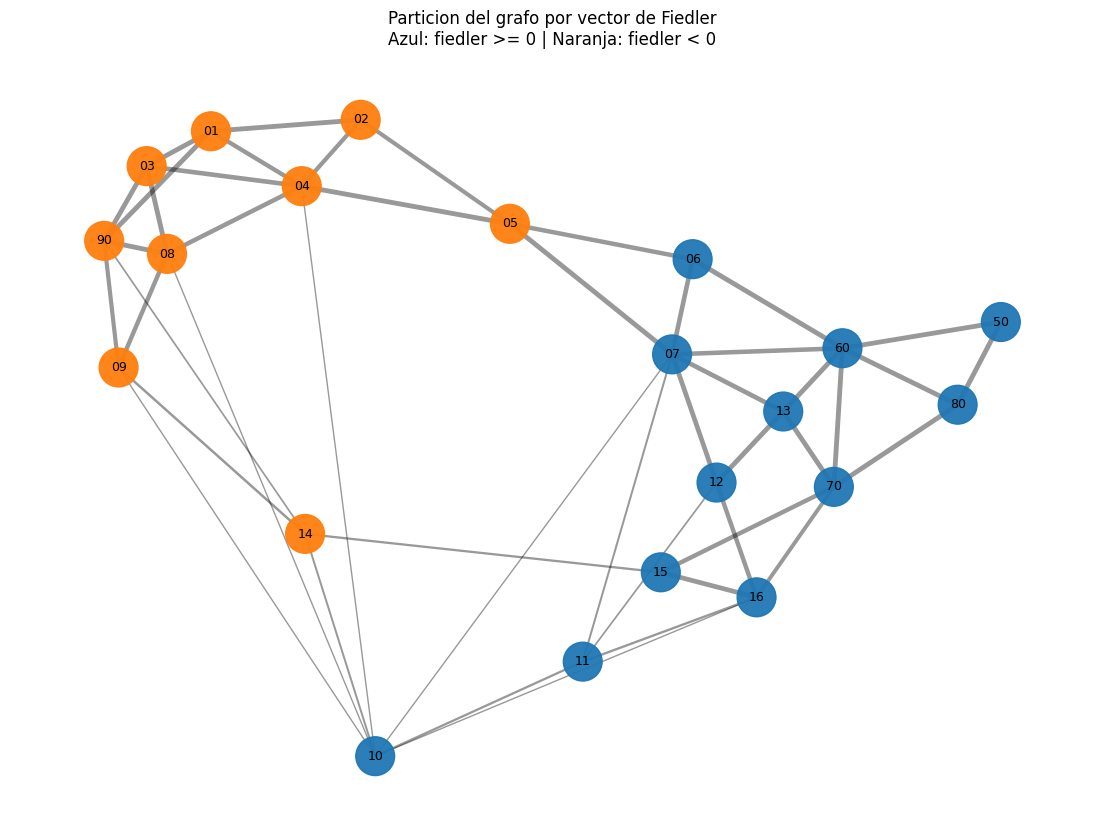

Leyenda de nodos:
00 -> 01 Popular
01 -> 02 Santa Cruz
02 -> 03 Manrique
03 -> 04 Aranjuez
04 -> 05 Castilla
05 -> 06 Doce de Octubre
06 -> 07 Robledo
07 -> 08 Villa Hermosa
08 -> 09 Buenos Aires
09 -> 10 La Candelaria
10 -> 11 Laureles Estadio
11 -> 12 La America
12 -> 13 San Javier
13 -> 14 El Poblado
14 -> 15 Guayabal
15 -> 16 Belen
16 -> 50 Palmitas
17 -> 60 San Cristobal
18 -> 70 Altavista
19 -> 80 Prado
20 -> 90 Santa Elena


In [26]:
# Paso 7: Graficamos el grafo y coloreamos nodos por grupo.
# Esto permite interpretar visualmente la particion propuesta.

# Grafica del grafo con la particion propuesta por el vector de Fiedler
G = nx.Graph()
G.add_nodes_from(range(len(labels)))

# Agregar aristas con peso W
for i in range(len(labels)):
    for j in range(i + 1, len(labels)):
        if A[i, j] == 1:
            G.add_edge(i, j, weight=W[i, j])

# Color por grupo (segun signo del vector de Fiedler)
node_colors = ["#1f77b4" if fiedler_vector[i] >= 0 else "#ff7f0e" for i in range(len(labels))]

# Grosor de arista proporcional al peso
edge_widths = [1.0 + 2.5 * G[u][v]["weight"] for u, v in G.edges()]

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=780, alpha=0.95)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.4)
nx.draw_networkx_labels(
    G,
    pos,
    labels={i: labels[i].split(" ", 1)[0] for i in range(len(labels))},
    font_size=9,
    font_color="black"
)

plt.title("Particion del grafo por vector de Fiedler\nAzul: fiedler >= 0 | Naranja: fiedler < 0")
plt.axis("off")
plt.show()

print("Leyenda de nodos:")
for i, name in enumerate(labels):
    print(f"{i:02d} -> {name}")

## Interpretacion y conclusiones

La particion espectral divide Medellin en dos macro-zonas a partir de la estructura del grafo ponderado:

- **Grupo 1** (fiedler >= 0): comunas del centro-occidente y corregimientos rurales (Robledo, Laureles, Belen, San Javier, La Candelaria, Palmitas, San Cristobal, Altavista, Prado, Doce de Octubre, Guayabal, La America).
- **Grupo 2** (fiedler < 0): comunas del nororiente y suroriente (Popular, Santa Cruz, Manrique, Aranjuez, Castilla, Villa Hermosa, Buenos Aires, El Poblado, Santa Elena).

El autovalor de Fiedler ($\lambda_2 \approx 0.061$) es pequeno, lo que indica que existe una separacion natural relativamente clara en el grafo. Un unico autovalor cercano a 0 confirma que el grafo es conexo.

La particion no separa simplemente "alto hurto vs bajo hurto", sino que refleja la combinacion de **vecindad geografica** y **similitud en el indicador de hurto**. Por ejemplo, El Poblado (hurto alto) queda en el Grupo 2 junto con comunas de bajo hurto porque esta geograficamente conectado a Buenos Aires y Santa Elena, y separado de los nodos de alto hurto del otro grupo (La Candelaria, Laureles).